In [208]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#Formatting describe()
pd.options.display.float_format = '{:,.2f}'.format

In [209]:
# Load cleaned_movies into DataFrame
movies_df = pd.read_csv('movies_final.csv')
#movies_df.head()

In [210]:
# Drop Unnamed column
movies_df = movies_df.loc[:,~movies_df.columns.str.contains('^Unnamed')]
#movies_df.describe()

# Functions

### Recommended: Column Count Descriptive Stats

In [211]:
#Obtain column value descriptive stats to determine count parameters
#Insert 1. 'column' in quotes 2. minimum quantile of dataframe to include
def count_cutoff(column, min):
    print(f"Top {min*100: .1f}% of {column} appearances in the movie dataframe")
    cutoff_df = movies_df[movies_df[column].map(movies_df[column].value_counts()) \
                    >= movies_df[column].value_counts().quantile(min)][column].value_counts()
    print(cutoff_df)
    print("\nSum and Percent Total of Dataframe")
    print(cutoff_df.sum())
    print(cutoff_df.sum() / 7412 * 100)
    print(f"\nAll {column} Count Descriptive Stats and Boxplot")
    print(movies_df[column].value_counts().describe())
    movies_df[column].value_counts().to_frame().boxplot(vert=False)
    plt.show()

## Dataframe Adjustments by Column Count
Recommend Using count_cutoff first to determine min/max

### Adjust Category Count Range by Raw Count

In [212]:
#Categorical variable reduction by value_count.  Uses movies_df dataframe  
#Insert 1. 'column' in quotes 2. minimum movie apperances (inclusive) 3. maximum movie apperances (inclusive)
#Returns a dataframe
def reduce_rawCount_df(column, min, max):
    df = movies_df[movies_df[column].map(movies_df[column].value_counts()) >= min]
    df = df[df[column].map(df[column].value_counts()) <= max]
    return df

### Adjust Category Count Range by Quantile

In [213]:
#Categorical variable reduction by value_count.  Uses movies_df dataframe  
#Insert 1. 'column' in quotes 2. minimum movie apperances by quantile (inclusive) 3. maximum movie apperances by quantile (inclusive)
#Returns a dataframe
def reduce_quantileCount_df(column, min, max):
    df = movies_df[movies_df[column].map(movies_df[column].value_counts()) >= movies_df['genre'].value_counts().quantile(min)]
    df = df[df[column].map(df[column].value_counts()) <= movies_df['genre'].value_counts().quantile(max)]
    return df

## Dataframe Adjustment by Category Score

### Adjust Median Category Score Range by Quantile

In [224]:
# #Categorical variable reduction by median_rating.  Uses movies_df dataframe  
# #Insert 1. 'column' in quotes 2. minimum movie apperances (inclusive) 3. maximum movie apperances (inclusive)
# #Returns a dataframe
# def reduce_df_median(column, min, max):
#     column_medians = movies_df.groupby([column]).median()['score']
#     df = movies_df[movies_df[column].map(movies_df.groupby([column]).median()['score']) >= column_medians.quantile(min)]
#     df = df[df[column].map(df[column].value_counts()) <= column_medians.quantile(max)]
#     return df

In [257]:
#Categorical variable reduction by median_rating.  Uses movies_df dataframe  
#Insert 1. 'column' in quotes 2. minimum movie apperances (inclusive) 3. maximum movie apperances (inclusive)
#Returns a dataframe
def reduce_median_df(df, column, min, max):
    column_medians = df.groupby([column]).median()['score']
    new_df = df[df[column].map(df.groupby([column]).median()['score']) >= column_medians.quantile(min)]
    new_df2 = new_df[new_df[column].map(new_df.groupby([column]).median()['score']) <= column_medians.quantile(max)]
    return new_df2

## Descriptive Statistics Analysis

### Categorical Ordered by Count

In [291]:
#insert dataframe and 'column' in quote
def cat_count(df, column):   
    #Column values and column value counts
    column_counts = df[column].value_counts()
    #Put column counts in a dataframe
    column_counts_df = pd.DataFrame(column_counts).rename(columns={column: "Count"})
    #Put the values in a list
    column_values_list = column_counts.index.to_list()
    
    #Get scores by column value
    value_scores = []
    for value in column_values_list:
        value_df = df.loc[df[column] == value]
        value_score = value_df['score'].to_list()
        value_scores.append(value_score)
    
    #Bargraph of column counts
    width = 15
    maximum = column_counts_df['Count'].max()
    if maximum < 15:
        width = maximum
    length = len(column_values_list)
    
    column_bar = column_counts_df.plot.barh(figsize = (width * .5, length * .5))
    column_bar.set_title(f"Number of Movies by {column}",fontsize=20)
    column_bar.set_xlabel("Count",fontsize=14)
    column_bar.set_ylabel(f"{column}",fontsize=14) 
    column_bar.legend(loc = 'lower right')
    plt.gca().invert_yaxis()

    #Add counts to bar graph
    for i, v in enumerate(column_counts):
        column_bar.text(v , i , str(v),
            color = 'black', fontweight = 'bold')
    
    plt.show()
    
    #Box plot for values and and value scores
    y_labels = column_values_list
    x_values = value_scores
    fig, ax = plt.subplots(figsize=(10, length * .3 ))
    ax.set_title(f'Score by {column}', fontsize=20)
    ax.set_xlabel("Scores", fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.boxplot(x_values, labels=y_labels, vert=False)
    plt.gca().invert_yaxis()
    ax.grid()
    # Save the figure.

    plt.show()

    print(f'All {column} Scores Descriptive Statistics')
    print(movies_df.groupby([column]).mean()['score'].describe())

### Categorical Ordered by Median Score

In [250]:
#insert dataframe and 'column' in quote
def cat_median(df, column):   
    #Column values and column value counts
    column_counts = df[column].value_counts()
    #Put column counts in a dataframe
    column_counts_df = pd.DataFrame(column_counts).rename(columns={column: "Count"})
    column_counts_df = column_counts_df.reset_index()
    #Get Medians
    median_df = df.groupby([column]).median()[['score']]

    #Merge
    merged_df = column_counts_df.merge(median_df, left_on='index', right_on=f'{column}')
    sorted_df = merged_df.sort_values(by='score')
    final_df = sorted_df.set_index('index')

    #Put the values in a list
    column_values_list = final_df.index.to_list()

    #Get scores by column value
    value_scores = []
    for value in column_values_list:
        value_df = df.loc[df[column] == value]
        value_score = value_df['score'].to_list()
        value_scores.append(value_score)

    #Bargraph of column counts
    width = 15
    maximum = column_counts_df['Count'].max()
    if maximum < 15:
        width = maximum
    length = len(column_values_list)
    
    length = len(column_values_list)
    column_bar = final_df[['Count']].plot.barh(figsize = (width * .5, length * .5))
    column_bar.set_title(f"Number of Movies by {column}",fontsize=20)
    column_bar.set_xlabel("Count",fontsize=14)
    column_bar.set_ylabel(f"{column}",fontsize=14) 
    column_bar.legend(loc = 'lower right')

    #Add counts to bar graph
    for i, v in enumerate(sorted_df['Count']):
        column_bar.text(v , i , str(v),
            color = 'black', fontweight = 'bold')

    plt.show()

    #Box plot for values and and value scores
    y_labels = column_values_list
    x_values = value_scores
    fig, ax = plt.subplots(figsize=(10, length * .3 ))
    ax.set_title(f'Score by {column}', fontsize=20)
    ax.set_xlabel("Scores", fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.boxplot(x_values, labels=y_labels, vert=False)
    ax.grid()
    # Save the figure.

    plt.show()

    print(f'All {column} Scores Descriptive Statistics')
    print(movies_df.groupby([column]).mean()['score'].describe())

In [ ]:
if sorted_df['Count'].max < 15
    width = sorted_df['Count'].max

### Numeric Ordered by Median

In [282]:
#insert 1. dataframe 2. 'column' in quotes 3/4. min/max display quantile in decimals (ex: .xx) 
def num_desc(df, column, x_min, x_max):
    
    # Create a box-and-whisker plot for the urban cities ride count.
    fig, ax = plt.subplots()
    ax.boxplot(movies_df[column], labels=[""],vert=False)
    # Add the title, y-axis label and grid.
    ax.set_title(column, fontsize=20)
    ax.set_xlabel('Score')
    ax.set_xlim(df[column].quantile(x_min), df[column].quantile(x_max))
    
    ax.grid()
    plt.show()
    
    # Plot actual vs. predicted rating
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(df[column], df['score'],)
    ax.set_xlim(df[column].quantile(x_min), df[column].quantile(x_max))
    plt.title(f'{column} versus Score',fontsize=20)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)

    ax.grid()
    plt.show()
    
    print(f'All {column} Scores Descriptive Statistics')
    print(df[column].describe())

# Summary of Functions

In [ ]:
#Obtain column value descriptive stats to determine count parameters
#Insert 1. 'column' in quotes 2. minimum quantile of dataframe to include
#count_cutoff(column, min_quantile)

### DataFrame Adjustments

In [50]:
##Adjustments by Count
#count_df =  reduce_rawCount_df('column', min_count, max_count)
#count_df = reduce_quantileCount_df('column', count_quantile_min, count__quantile_max)

#Adjustments by Category Median Score
#median_df = reduce_median_df('column', quantile_min, quantile_max)

### Descriptive Stats

In [42]:
#Ordered by 1.Categorical Count 2. Categorical Median 3. Numeric Median
###NOTE: Numeric variables are not naturally binned and so are not described by count
#1. cat_count(df, 'column')
#2. cat_median(df, 'column')
#3. num_desc(df, 'column', percentile_min, percentile_max)

### Variables

In [43]:
##Categorical
# rating
# genre
# year
# director
# writer
# star
# country
# company

##Numeric
# votes
# gross
# runtime

# Analysis

### Score (for context)

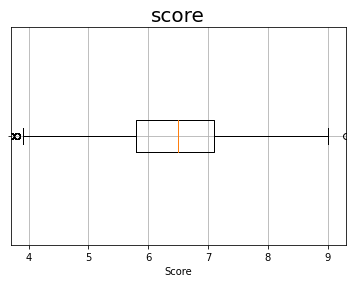

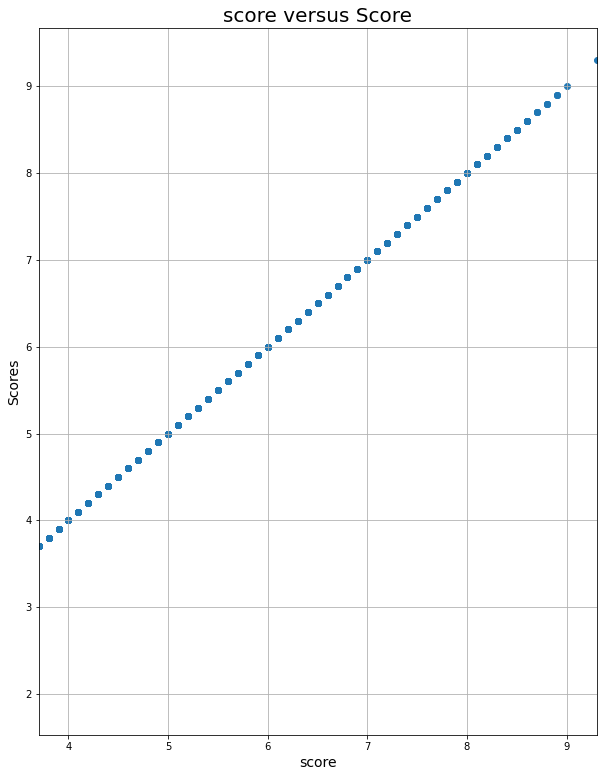

All score Scores Descriptive Statistics
count   7,412.00
mean        6.40
std         0.96
min         1.90
25%         5.80
50%         6.50
75%         7.10
max         9.30
Name: score, dtype: float64


In [295]:
num_desc(movies_df, 'score', .01, 1)

### Company

Top  0.0% of genre appearances in the movie dataframe
Comedy       2182
Action       1666
Drama        1439
Crime         536
Biography     429
Adventure     419
Animation     331
Horror        304
Fantasy        42
Mystery        20
Thriller       12
Family         10
Romance         8
Sci-Fi          8
Western         3
Music           1
Sport           1
Musical         1
Name: genre, dtype: int64

Sum and Percent Total of Dataframe
7412
100.0

All genre Count Descriptive Stats and Boxplot
count      18.00
mean      411.78
std       660.07
min         1.00
25%         8.00
50%        31.00
75%       426.50
max     2,182.00
Name: genre, dtype: float64


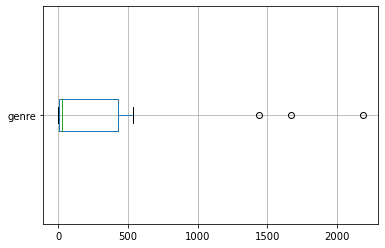

In [301]:
count_cutoff("genre", .0)

In [304]:
genre_df =  reduce_rawCount_df('genre', 0, 9999)
genre_df2 = reduce_median_df(company_df, 'company', 0, 1)

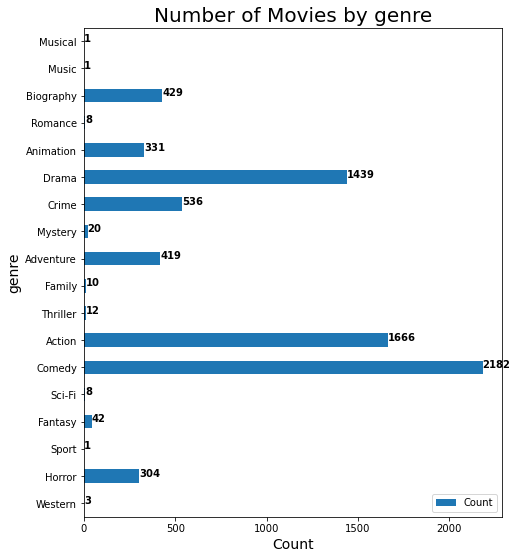

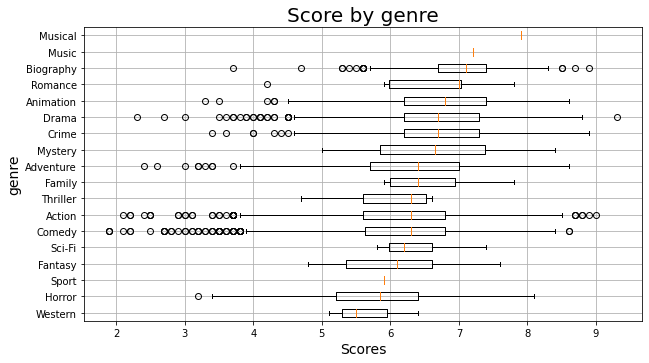

All genre Scores Descriptive Statistics
count   18.00
mean     6.47
std      0.55
min      5.67
25%      6.09
50%      6.44
75%      6.69
max      7.90
Name: score, dtype: float64


In [305]:
cat_median(genre_df2, 'genre')

### Actor

Top  87.0% of star appearances in the movie dataframe
Nicolas Cage         43
Robert De Niro       41
Tom Hanks            41
Denzel Washington    37
Bruce Willis         34
                     ..
Bill Pullman          5
Cillian Murphy        5
Treat Williams        5
Frances McDormand     5
Kevin Hart            5
Name: star, Length: 368, dtype: int64

Sum and Percent Total of Dataframe
4076
54.99190501888829

All star Count Descriptive Stats and Boxplot
count   2,652.00
mean        2.79
std         4.30
min         1.00
25%         1.00
50%         1.00
75%         2.00
max        43.00
Name: star, dtype: float64


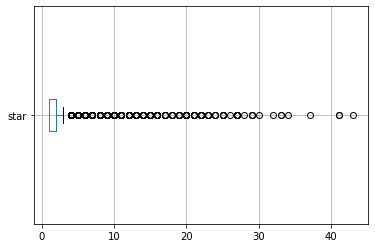

In [269]:
count_cutoff("star", .87)

In [278]:
reduce_rawCount_df('star', 5, 999)['score'].describe()

count   4,076.00
mean        6.46
std         0.85
min         1.90
25%         5.90
50%         6.50
75%         7.00
max         9.30
Name: score, dtype: float64

In [279]:
reduce_rawCount_df('star', 0, 4)['score'].describe()

count   3,336.00
mean        6.32
std         1.08
min         1.90
25%         5.70
50%         6.40
75%         7.10
max         8.70
Name: score, dtype: float64